# BRAIN TUMOR DETECTION USING CNN

## Import Libraries

In [2]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

## One Hot Encoder

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0],[1]])

OneHotEncoder()

## Copying the image dataset into numpy array

### [Dataset](https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

In [4]:
data = []
paths = []
result = []

for r, d, folder in os.walk(r'./brain_tumor_detection_dataset/no'):
    for file in folder:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
paths = []

for r, d, folder in os.walk(r'./brain_tumor_detection_dataset/yes'):
    for file in folder:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128, 128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [9]:
result = np.array(result)
result = result.reshape(139, 2)

## Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [11]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(111, 128, 128, 3) (111, 2)
(28, 128, 128, 3) (28, 2)


## CNN Model

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2), input_shape=(128,128,3), padding='Same'))
model.add(Conv2D(32, kernel_size=(2,2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))
model.add(Conv2D(64, kernel_size=(2,2), activation='relu', padding='Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

## Validation

In [13]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1, validation_data=(x_test,y_test))

Epoch 1/30
3/3 [==============================] - 18s 3s/step - loss: 45.6013 - val_loss: 158.4275
Epoch 2/30
3/3 [==============================] - 5s 2s/step - loss: 20.3344 - val_loss: 80.1856
Epoch 3/30
3/3 [==============================] - 5s 2s/step - loss: 7.4823 - val_loss: 82.6469
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 7.3907 - val_loss: 20.6227
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 5.2130 - val_loss: 14.4351
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 1.4118 - val_loss: 38.0014
Epoch 7/30
3/3 [==============================] - 5s 1s/step - loss: 2.4758 - val_loss: 45.9155
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 0.8866 - val_loss: 41.9549
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 1.0749 - val_loss: 31.5650
Epoch 10/30
3/3 [==============================] - 4s 1s/step - loss: 0.6907 - val_loss: 21.1165
Epoch 11/30
3/3 [==================

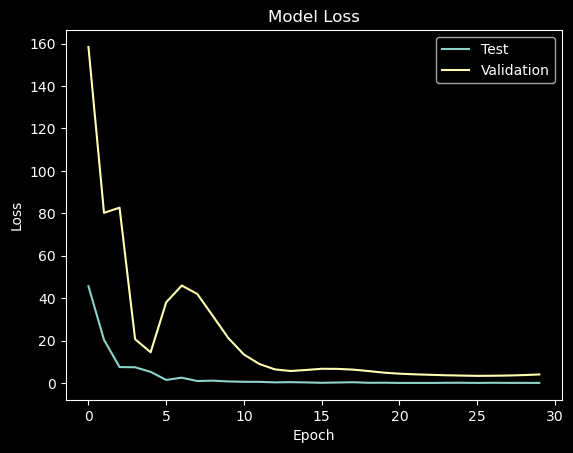

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

## Prediction

In [22]:
def labels(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No Its not a tumor'

99.99942779541016% Confidence, No Its not a tumor


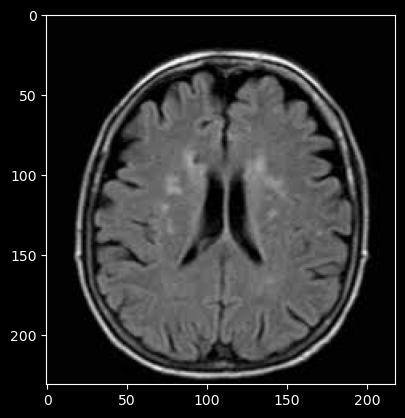

In [23]:
from matplotlib.pyplot import imshow
img = Image.open(r"./brain_tumor_dataset/no/17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence, ' + labels(classification))

100.0% Confidence, Its a Tumor


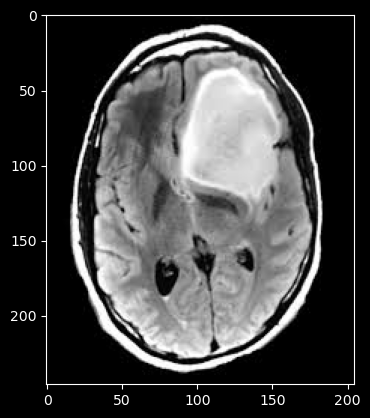

In [24]:
from matplotlib.pyplot import imshow
img = Image.open(r"./brain_tumor_dataset/yes/Y105.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence, ' + labels(classification))